# Building Reports for a Finance Company
> This is the solution task for a [Guided Project](https://app.datacamp.com/learn/projects/1857) by Rohan Chatterjee, available on DataCamp.
> 


### Problem Statement : 
You are working for a hedge fund and your manager wants some quick analysis on the profitability and leverage of companies from various industries.
Your manager is particularly interested in investing in real estate companies and is wondering if highly leveraged real estate companies are more profitable.
You decide to use your skills with analyzing, computing, and visualizing financial ratios to help him!



           profitability_ratio
comp_type                     
fmcg                  0.207112
real_est              0.299938
tech                  0.273889
           leverage_ratio
comp_type                
fmcg             4.049784
real_est         7.353476
tech             2.777448


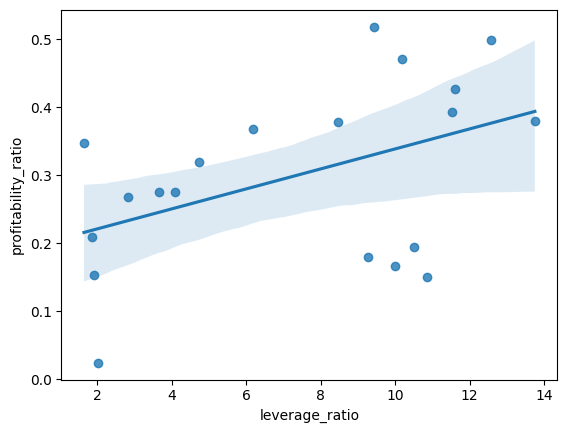

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Read in the files
balance_sheet = pd.read_excel("data/Balance_Sheet.xlsx")
income_statement = pd.read_excel("data/Income_Statement.xlsx")

# Merge both the dataframes and call it df_ratios
df_ratios = pd.merge(income_statement, balance_sheet, on = ["Year", "company", "comp_type"])

# You only need to compute one profitability ratio, but since there is a choice, we are providing the code to compute both the gross margin ratio and the operating margin ratio 

# Compute gross margin ratio
df_ratios["profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Cost Of Goods Sold"])/df_ratios["Total Revenue"]

# Compute operating margin ratio, but commenting it out
df_ratios["profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Total Operating Expenses"])/df_ratios["Total Revenue"]

# You only need to compute one leverage ratio, but we are providing the code to compute both the debt-to-equity ratio and the equity multiplier ratio 

# Compute debt-to-equity ratio
df_ratios["leverage_ratio"] = df_ratios["Total Liab"]/df_ratios["Total Stockholder Equity"]

# Compute equity multiplier ratio, but commenting it out
df_ratios["leverage_ratio"] = df_ratios["Total Assets"]/df_ratios["Total Stockholder Equity"]

# Using pivot table to see the "comp_type" with the lowest average profitability ratio
print(df_ratios.pivot_table(index="comp_type", values="profitability_ratio"))
lowest_profitability = "fmcg"

# Using pivot table to see the "comp_type" with the highest average leverage ratio
print(df_ratios.pivot_table(index="comp_type", values="leverage_ratio"))
highest_leverage = "real_est"

# Plot the leverage ratio on x-axis and profitability on y axis to see if real estate companies with higher leverage ratio have  higher profitability
df_real_est = df_ratios.loc[df_ratios["comp_type"]=="real_est"]
plot = sns.regplot(data=df_real_est, x="leverage_ratio", y="profitability_ratio")
relationship = "positive"

In [2]:
df_real_est.head()

,Unnamed: 0_x,Year,comp_type,company,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue,Unnamed: 0_y,...,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity,profitability_ratio,leverage_ratio
20,20,2018,real_est,BAM,45519000000,12970000000,9764000000,48725000000,58489000000,20,...,6.989000e+09,151936000000,NaN,256281000000,35980000000,19284000000,159131000000,25647000000,0.166937,9.992631
21,21,2019,real_est,BAM,52728000000,18881000000,13907000000,57702000000,71609000000,21,...,1.027200e+10,186059000000,NaN,323969000000,40771000000,27752000000,207123000000,30868000000,0.194207,10.495303
22,22,2020,real_est,BAM,53177000000,9496000000,9395000000,53278000000,62673000000,22,...,1.036000e+10,196876000000,NaN,343696000000,47749000000,34004000000,221054000000,31693000000,0.149905,10.844540
23,23,2021,real_est,BAM,64000000000,14182000000,14066000000,64116000000,78182000000,23,...,1.141500e+10,216354000000,NaN,391003000000,60664000000,48353000000,256262000000,42210000000,0.179914,9.263279
24,24,2018,real_est,AMT,2177800000,5262300000,2742300000,4697800000,7440100000,24,...,NaN,11247100000,NaN,33010400000,2385100000,4689900000,26106000000,5336100000,0.368584,6.186241
